<a href="https://colab.research.google.com/github/dellanie/Project-Capstone/blob/main/Ldacapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up the imports

In [ ]:
import pandas as pd
import numpy as np

import spacy

!pip install pyLDAvis
!python -m spacy download en_core_web_md
import nltk
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-26 20:01:03.592465: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-26 20:01:03.592646: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-26 20:01:03.592677: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries.

In [ ]:
Full_data = pd.read_csv('sub_final.csv')

In [ ]:
#make copy of data for future reference
Full_data_copy = Full_data

#Data cleaing starts here
Full_data.reset_index(inplace=True,drop=True)
Full_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
Full_data.isnull().sum()

Submission_ID       0
Question            0
JediConsultantID    0
Submission_Text     1
Submission_Date     0
dtype: int64

In [ ]:
Full_data.dropna(axis=0, how='all', thresh=None, subset=['Submission_Text'], inplace=True)
Full_data.isnull().sum()

Submission_ID       0
Question            0
JediConsultantID    0
Submission_Text     0
Submission_Date     0
dtype: int64

In [ ]:
#Preprocessing starts here
#cleaning text. Essentially removing puntuations,digits and making all text lower case
import string
def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])

    return text2.lower()

In [ ]:
Full_data['Submission_Text']=Full_data['Submission_Text'].apply(clean_text)
Full_data.Submission_Text

0       best ways make listening more impactful event ...
1       make listening more impactful event workshop s...
2       make listening more impactful practice active ...
3       make listening more impactful important fully ...
4       make listening more impactful important approa...
                              ...                        
1995    establish timelines establish clear timelines ...
1996    monitor progress regularly monitor progress to...
1997    evaluate results once action plan been impleme...
1998    communicate effectively effective communicatio...
1999    allocate resources ensure that sufficient reso...
Name: Submission_Text, Length: 1999, dtype: object

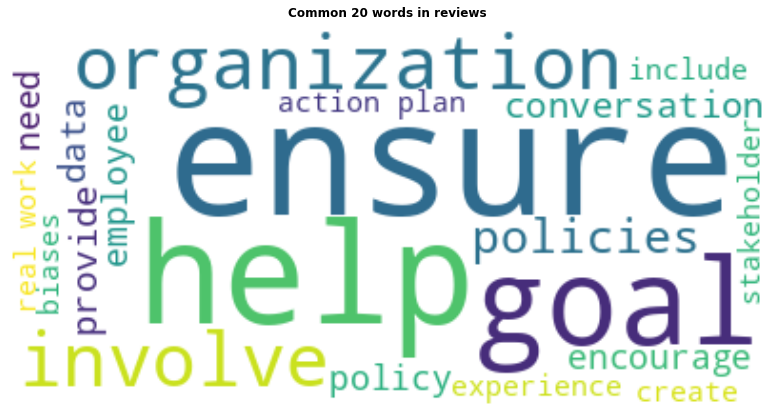

In [ ]:
#making a word cloud to identify more words we can identify to the nltk stopwords
long_string = ','.join(list(Full_data.Submission_Text.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white",max_words=20, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

plt.figure(figsize= (50,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Common 20 words in reviews", pad = 14, weight = 'bold')

plt.show()


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#download the nltk stopwords
# from the word cloud above we can see the most common words, so we remove them from the data to give us a more accurate/unskewed result
from nltk.corpus import stopwords
nltk.download('stopwords')
#Setting up stopwords
stop_words = stopwords.words('english')
#stop_words.extend to add more words to the stopword package

stop_words.extend(['help','important','inclusion','create','organization','diversity','policies',
                   'ensure','conversation','employee','perspective','creating','experience','biases'
                    'culture','understanding','support','stakeholders','policy','recognize','enhance',
                   'others','encourage','feedback','real work','understand','help','challenge','need','challenge','impact','use','goal'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
Full_data['Submission_Text']=Full_data['Submission_Text'].apply(remove_stopwords)

In [ ]:
nlp = spacy.load('en_core_web_sm')

def lemmatization(text):
  rev_text = nlp(text)
  # Extract lematized words in lower case format if not digits, not punctuation, not stopword, and length not less than 2
  rev_text = ([token.lemma_.lower() for token in rev_text if not token.is_stop and token.text not in stop_words and not token.is_punct and len(token.text) > 3])
  return rev_text

In [ ]:
from datetime import datetime
import re

In [ ]:
%%time
Full_data['Submission_Text'] = Full_data['Submission_Text'].apply(lemmatization)

CPU times: user 25.6 s, sys: 1.34 ms, total: 25.6 s
Wall time: 36.7 s


In [ ]:
Clean_Full_data= Full_data['Submission_Text']
Clean_Full_data

0       [good, way, listen, impactful, event, workshop...
1       [listen, impactful, event, workshop, start, se...
2       [listen, impactful, practice, active, listenin...
3       [listen, impactful, fully, present, engaged, m...
4       [listen, impactful, approach, open, mind, will...
                              ...                        
1995    [establish, timeline, establish, clear, timeli...
1996    [monitor, progress, regularly, monitor, progre...
1997    [evaluate, result, action, plan, implement, ev...
1998    [communicate, effectively, effective, communic...
1999    [allocate, resource, sufficient, resource, inc...
Name: Submission_Text, Length: 1999, dtype: object

In [ ]:
from gensim import corpora

In [ ]:
%%time
# Create Dictionary
id2word_1 = corpora.Dictionary(Clean_Full_data)

# Create Corpus: Term Document Frequency
corpus_1 = [id2word_1.doc2bow(review) for review in Clean_Full_data]

CPU times: user 77.9 ms, sys: 2.82 ms, total: 80.7 ms
Wall time: 84.4 ms


Building the model

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2023-03-26 20:01:52--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2023-03-26 20:01:52--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  14.2MB/s    in 1.1s    

2023-03-26 20:01:54 (14.2 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [ ]:
import zipfile
from google.colab import files

uploaded = files.upload()

In [ ]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26528003 sha256=7d8afbeafdc33c661041b1a6f7cd144caa7a47b140434f68fd53bf75eaba882d
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [ ]:
# Import mallet packages
import os
#import little_mallet_wrapper as lmw
from gensim import models
from gensim.models.wrappers import LdaMallet
from gensim.models.wrappers.ldamallet import malletmodel2ldamodel
#os.environ.update({'MALLET_HOME':r"‪C:\Users\alanr\OneDrive\mallet-2.0.8"}) # My mallet path, it is needed to instantiate MAllet model


In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this

In [ ]:
%%time
#  point the path to the mallet path on my computer
#mallet_path = r'‪C:\Users\alanr\OneDrive\mallet-2.0.8\src\cc\mallet' #insert the path

# Instantiate
ldamallet = LdaMallet(mallet_path= mallet_path,corpus=corpus_1, num_topics=20, id2word=id2word_1)

CPU times: user 387 ms, sys: 58.4 ms, total: 446 ms
Wall time: 37.6 s


In [ ]:
# Show Topics
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=Clean_Full_data, dictionary=id2word_1, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\n Mallet Coherence Score: ', coherence_ldamallet)

[(18,
  [('engage', 0.09195402298850575),
   ('community', 0.0872210953346856),
   ('promote', 0.08248816768086545),
   ('seek', 0.06220419202163624),
   ('perspective', 0.05341446923597025),
   ('allyship', 0.05273833671399594),
   ('actively', 0.05070993914807302),
   ('engagement', 0.04394861392832995),
   ('safe', 0.03786342123056119),
   ('individual', 0.03718728870858688)]),
 (3,
  [('challenge', 0.07330195023537324),
   ('implement', 0.06792199058507062),
   ('potential', 0.05783456624075319),
   ('risk', 0.0363147276395427),
   ('consequence', 0.0363147276395427),
   ('unintended', 0.02824478816408877),
   ('public', 0.026227303295225286),
   ('difficult', 0.025554808338937456),
   ('implementation', 0.023537323470073975),
   ('lack', 0.023537323470073975)]),
 (2,
  [('goal', 0.12445550715619166),
   ('clear', 0.09458618543870566),
   ('develop', 0.07965152457996266),
   ('establish', 0.06658369632856254),
   ('achieve', 0.05724953329184816),
   ('objective', 0.0553827006845052

Cohernce value measures interpretable the topics are

Find the optimum number of topics

In [ ]:
# Defining a function to get coherence score
def my_coherence_vals(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMallet(mallet_path, corpus=corpus_1, num_topics=num_topics, id2word=id2word_1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# To get the coherence values
model_list, coherence_values = my_coherence_vals(dictionary=id2word_1, corpus=corpus_1,
                                                 texts=Clean_Full_data, start=2, limit=35, step=6)

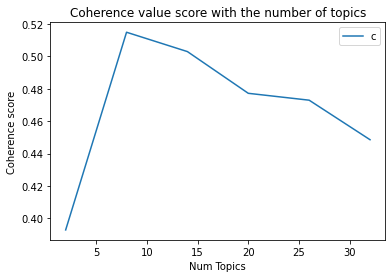

In [ ]:
# Show graph for the coherence value scores vs number of topics
limit=35; start=2; step=6;
topics = range(start, limit, step)
plt.plot(topics, coherence_values)
plt.title("Coherence value score with the number of topics")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for best, cv in zip(topics, coherence_values):
    print("Topic ", best, " has Coherence Value of", round(cv, 4))

Topic  2  has Coherence Value of 0.3928
Topic  8  has Coherence Value of 0.5149
Topic  14  has Coherence Value of 0.503
Topic  20  has Coherence Value of 0.4772
Topic  26  has Coherence Value of 0.4729
Topic  32  has Coherence Value of 0.4485


Based on the coherence values above we can see that topic 15 has the highest coherence value with 0.5224

In [ ]:
# printing the best topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.122*"bias" + 0.061*"experience" + 0.051*"people" + 0.050*"marginalize" + '
  '0.044*"address" + 0.032*"perspective" + 0.031*"background" + 0.029*"voice" '
  '+ 0.028*"racial" + 0.027*"seek"'),
 (1,
  '0.089*"include" + 0.062*"community" + 0.059*"equity" + 0.058*"promote" + '
  '0.044*"company" + 0.040*"group" + 0.039*"commitment" + 0.032*"individual" + '
  '0.031*"share" + 0.030*"workplace"'),
 (2,
  '0.093*"datum" + 0.070*"language" + 0.048*"inclusive" + 0.042*"information" '
  '+ 0.036*"hold" + 0.032*"accountable" + 0.028*"present" + 0.023*"reader" + '
  '0.022*"transparent" + 0.019*"leader"'),
 (3,
  '0.236*"work" + 0.082*"involve" + 0.056*"real" + 0.048*"performative" + '
  '0.042*"mentor" + 0.041*"mentee" + 0.037*"coach" + 0.029*"focus" + '
  '0.027*"good" + 0.022*"change"'),
 (4,
  '0.059*"conflict" + 0.047*"issue" + 0.036*"focus" + 0.027*"person" + '
  '0.027*"flexible" + 0.026*"solution" + 0.023*"find" + 0.022*"party" + '
  '0.020*"resolve" + 0.018*"stay"'),
 (5,
  '0

In [ ]:
import gensim
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [ ]:
#Visualize the topic
import pyLDAvis
import gensim
from pyLDAvis import gensim
from gensim.models.ldamodel import LdaModel
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(model, corpus=corpus_1, dictionary=id2word_1,sort_topics=False)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.293407  0.050304       1        1  6.264200
1     -0.100237  0.120353       2        1  4.834064
2     -0.057617 -0.087137       3        1  4.952674
3     -0.124853  0.049693       4        1  4.881448
4     -0.047866 -0.306835       5        1  4.924985
5      0.091960  0.051897       6        1  4.801709
6      0.031843 -0.032337       7        1  4.955997
7     -0.227975  0.156682       8        1  4.869604
8      0.000614 -0.031757       9        1  4.762495
9      0.079978  0.016174      10        1  4.784781
10    -0.132947  0.101253      11        1  4.760437
11     0.077327  0.125295      12        1  5.545111
12     0.225115  0.053297      13        1  5.178868
13     0.023357  0.055417      14        1  4.926498
14    -0.087180 -0.066028      15        1  4.931798
15    -0.156206  0.089057      16        1  4.914662
16     0.130166 -0.055321      17        1  4.959160
17    -0.065263 -0.310990      18        1  5.042688
18     0.035364 -0.007695      19        1  4.898734
19     0.011011  0.028677      20        1  4.810088, topic_info=         Term        Freq       Total Category  logprob  loglift
294      work  543.000000  543.000000  Default  30.0000  30.0000
15    provide  348.000000  348.000000  Default  29.0000  29.0000
308    action  267.000000  267.000000  Default  28.0000  28.0000
742  employee  278.000000  278.000000  Default  27.0000  27.0000
244   diverse  318.000000  318.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
298    factor   12.894399   16.279505  Topic20  -4.8269   2.8013
149   message   37.510978   80.071895  Topic20  -3.7590   2.2762
831  behavior   28.133233   62.100439  Topic20  -4.0467   2.2427
346    manner   11.722181   15.202454  Topic20  -4.9222   2.7745
190  relevant   18.755489   64.349534  Topic20  -4.4522   1.8016

[1108 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1536     17  0.963639    abstract
541       2  0.945357      access
541      10  0.047268      access
414       9  1.019838  accessible
1190      4  1.062143     account
...     ...       ...         ...
21       16  0.741824    workshop
896      12  0.891239   workspace
131      13  1.010907       world
1490      8  0.935331   worldview
796      15  1.022313        zone

[1262 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# Interpretation

*   Addressing biases that may exist in the hiring process, which may perpetuate inequities in the workplace.
*   Effective communication by involving active listening
*   Goal Setting and planning
*   Provide opportunities for career development and establish a flexible and accommodating work environment that meets the needs of diverse talent.
*   Be transparent about our goals and progress, we can build trust and work together more effectively towards our shared objectives.
*   Maintain confidence in the ability to find a resolution and following through on commitments can help to prevent future conflicts and maintain positive relationships
*   Employee Development and Inclusion

In [ ]:
#Topic 1

In [ ]:
#Finding LDA for each dimension

Make Listening more impactful


In [ ]:
Dim_1 = pd.read_excel('Book1.xlsx')
Dim_1

,First Name,Last Name,JediID,SubmissionID,Date,Email,Age,Gender,Q111,Q112,...,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q130
0,Lolita,Freeman,100,1,2023-03-26,cruickshank.efren@armstrong.biz,29,F,One of the best ways to make listening more im...,Building the reader's confidence in facts and ...,...,Set clear goals and expectations: Establishing...,"Effective of work few elements First and, it i...",Best in involve clear that easily by stakehold...,"policy, are of and that be into account For, t...",Utilize diverse pool job applicants. out to or...,Expand the recruitment channels: To increase d...,Provide opportunities for professional growth:...,clear and for coaching mentorship. Establish a...,"An action should of, and, of each should compl...",Following practices developing implementing es...
1,Harriet,Scott,200,2,2023-03-26,plarkin@yahoo.com,46,F,To make listening more impactful in an event o...,"In order to build trust with the reader, it's ...",...,Involve diverse perspectives: Engaging diverse...,It is important to ensure that the tone of the...,Evidence-based decision making: Policies shoul...,To address these and challenges policy makers ...,Make sure job are welcoming to diverse. Make s...,Use inclusive language: Using inclusive langua...,Offer flexibility: Providing flexible work arr...,Focus one goal a time and towards helping ment...,Identify the goal: Start by identifying the sp...,Clearly define the problem or opportunity: Beg...
2,Susanne,Bailey,300,3,2023-03-26,qnienow@funk.info,26,F,One way to make listening more impactful is to...,"To make statistics and data more impactful, it...",...,Monitor and measure progress: Regular monitori...,Clarity and transparency: It's important to be...,Inclusive and participatory policy development...,Resistance to change: One of the biggest chall...,Maintain an hiring process. Be sure keep the s...,Emphasize diversity in your employer brand: If...,Foster a culture of inclusion: Create a cultur...,Establish clear goals: Establish clear and ach...,Break it down into smaller tasks: Once you hav...,"Set specific, measurable goals: Goals should b..."
3,Sophia,Dean,400,4,2023-03-26,napoleon.cassin@emmerich.com,48,F,"To make listening more impactful, it's importa...",Context is key when it comes to presenting dat...,...,Address implicit biases: Implicit biases can u...,Results-oriented approach: Focusing on results...,Continuous policy evaluation and review: Polic...,Unintended consequences: There is always a ris...,Incorporate diversity the recruiting process B...,Leverage employee referrals: Encourage your em...,Celebrate diversity: Celebrate the diverse bac...,Active listening: Listen actively and attentiv...,Prioritize: Prioritize the tasks based on thei...,Identify actions and strategies: Develop a pla...
4,Madeline,Russell,500,5,2023-03-26,zachery.harber@altenwerth.org,55,F,"To make listening more impactful, it's importa...",One effective way to build confidence in stati...,...,Address systemic barriers: Challenging the sta...,Data-driven: Using data to support the work be...,Transparency and accountability: Policies shou...,Limited resources: Creating and implementing n...,Have zero tolerance policy on. Make sure your ...,Partner with diversity-focused organizations: ...,Ensure equal opportunities: Ensure that all te...,Regular meetings: Regular meetings with the me...,Assign responsibilities: Assign responsibiliti...,Assign responsibilities: Assign responsibiliti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Dwayne,Oneal,9600,96,2023-03-26,lora53@yahoo.com,72,M,"To make listening more impactful, it's importa...",Use data to identify the costs and benefits of...,...,Partnering with community organizations: Compa...,Practice good time management: Set realistic d...,Establish clear goals and objectives: Clearly ...,Resistance to Enforcement: Resistance to enfor...,Training for hiring managers: Provide training...,Reach out to di

In [ ]:
concatvalues = np.concatenate([Dim_1.Q111.values,Dim_1.Q112.values,Dim_1.Q113.values,Dim_1.Q114.values,Dim_1.Q115.values])

df2 = pd.concat([Dim_1,pd.DataFrame(concatvalues)], ignore_index=True, axis=1)
df2.columns = np.append(Dim_1.columns.values, "LI")

print(df2)

    First Name Last Name  JediID  SubmissionID       Date  \
0       Lolita   Freeman   100.0           1.0 2023-03-26   
1      Harriet     Scott   200.0           2.0 2023-03-26   
2      Susanne    Bailey   300.0           3.0 2023-03-26   
3       Sophia      Dean   400.0           4.0 2023-03-26   
4     Madeline   Russell   500.0           5.0 2023-03-26   
..         ...       ...     ...           ...        ...   
495        NaN       NaN     NaN           NaN        NaT   
496        NaN       NaN     NaN           NaN        NaT   
497        NaN       NaN     NaN           NaN        NaT   
498        NaN       NaN     NaN           NaN        NaT   
499        NaN       NaN     NaN           NaN        NaT   

                               Email   Age Gender  \
0    cruickshank.efren@armstrong.biz  29.0      F   
1                  plarkin@yahoo.com  46.0      F   
2                  qnienow@funk.info  26.0      F   
3       napoleon.cassin@emmerich.com  48.0      F   
4 

In [ ]:
Dim_1.isnull().sum()
Dim_1.dropna(axis=0, how='all', thresh=None, subset=['Q117'], inplace=True)
Dim_1.isnull().sum()

First Name      0
Last Name       0
JediID          0
SubmissionID    0
Date            0
Email           0
Age             0
Gender          0
Q111            0
Q112            0
Q113            0
Q114            0
Q115            0
Q116            0
Q117            0
Q118            0
Q119            0
Q120            0
Q121            0
Q122            0
Q123            0
Q124            0
Q125            0
Q126            0
Q127            0
Q128            0
Q129            0
Q130            0
dtype: int64

In [ ]:
Dim_1['Q111'] = Dim_1['Q111'].apply(clean_text)
Dim_1.Q111
#Dim_1_clean =  [clean_text(i) for i in Dim_1]

0     best ways make listening more impactful event ...
1     make listening more impactful event workshop s...
2     make listening more impactful practice active ...
3     make listening more impactful important fully ...
4     make listening more impactful important approa...
                            ...                        
94    make listening more impactful important recogn...
96    make listening more impactful important recogn...
97    make listening more impactful important recogn...
98    make listening more impactful important recogn...
99    make listening more impactful important recogn...
Name: Q111, Length: 99, dtype: object

In [ ]:
Dim_1['Q111']=Dim_1['Q111'].apply(remove_stopwords)

In [ ]:
Dim_1['Q111'] = Dim_1['Q111'].apply(lemmatization)

In [ ]:
Dim_1_clean = Dim_1['Q111']

In [ ]:
id2word_1 = corpora.Dictionary(Dim_1_clean)
id2word_1.filter_extremes(no_below=2, no_above=1.0)

# Create Corpus: Term Document Frequency
corpus_1 = [id2word_1.doc2bow(review) for review in Dim_1_clean]

In [ ]:
# Instantiate
ldamallet = LdaMallet(mallet_path, corpus=corpus_1, num_topics=15, id2word=id2word_1)

In [ ]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=Dim_1_clean, dictionary=id2word_1, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\n Mallet Coherence Score: ', coherence_ldamallet)


 Mallet Coherence Score:  0.48615530978170146


In [ ]:
# To get the coherence values
model_list, coherence_values = my_coherence_vals(dictionary=id2word_1, corpus=corpus_1,
                                                 texts=Dim_1_clean, start=2, limit=35, step=6)

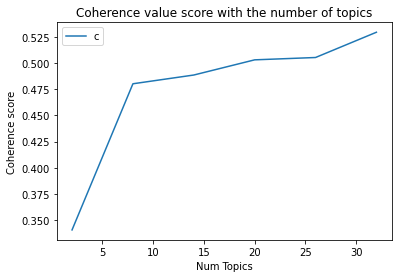

In [ ]:
# Show graph for the coherence value scores vs number of topics
limit=35; start=2; step=6;
topics = range(start, limit, step)
plt.plot(topics, coherence_values)
plt.title("Coherence value score with the number of topics")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for best, cv in zip(topics, coherence_values):
    print("Topic ", best, " has Coherence Value of", round(cv, 4))

Topic  2  has Coherence Value of 0.3406
Topic  8  has Coherence Value of 0.4802
Topic  14  has Coherence Value of 0.4885
Topic  20  has Coherence Value of 0.5031
Topic  26  has Coherence Value of 0.5053
Topic  32  has Coherence Value of 0.5294


In [ ]:
# printing the best topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.172*"deepen" + 0.144*"question" + 0.079*"open" + 0.070*"information" + '
  '0.060*"mindset" + 0.056*"perspective" + 0.056*"approach" + 0.037*"idea" + '
  '0.028*"growth" + 0.028*"strengthen"'),
 (1,
  '0.235*"build" + 0.141*"respect" + 0.127*"strong" + 0.108*"patient" + '
  '0.080*"relationship" + 0.066*"environment" + 0.042*"message" + 0.038*"safe" '
  '+ 0.033*"feeling" + 0.028*"thought"'),
 (2,
  '0.235*"attentive" + 0.215*"avoid" + 0.210*"impactful" + 0.110*"interrupt" + '
  '0.085*"respect" + 0.025*"constructive" + 0.025*"openende" + '
  '0.025*"assumption" + 0.015*"multitaske" + 0.010*"global"'),
 (3,
  '0.424*"speaker" + 0.166*"seek" + 0.134*"additionally" + 0.078*"interrupt" + '
  '0.051*"attentive" + 0.023*"clarification" + 0.018*"message" + '
  '0.018*"curious" + 0.014*"demonstrate" + 0.014*"accurately"'),
 (4,
  '0.193*"relationship" + 0.139*"involve" + 0.089*"respect" + '
  '0.079*"conversation" + 0.074*"build" + 0.069*"present" + 0.064*"fully" + '
  '0.045*"mindf